In [ ]:
import numpy as np
import cv2
from PIL import Image

In [72]:
import os

images_path = os.listdir("data")

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
from processing_util import *

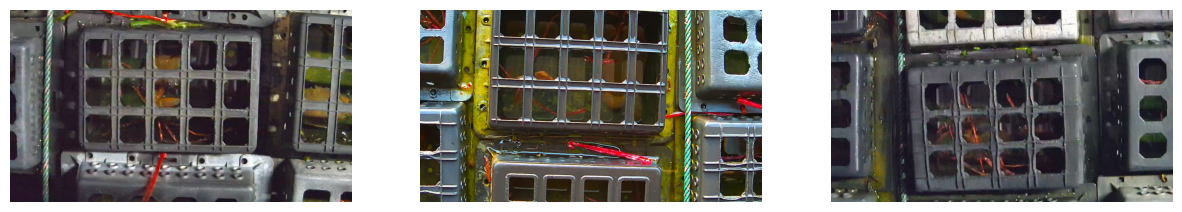

In [75]:
images = [cv2.imread("data/"+i) for i in images_path]
images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images]


show_images(images)

In [76]:
# convert to HSV
hsv_images = [cv2.cvtColor(image, cv2.COLOR_RGB2HSV) for image in images]

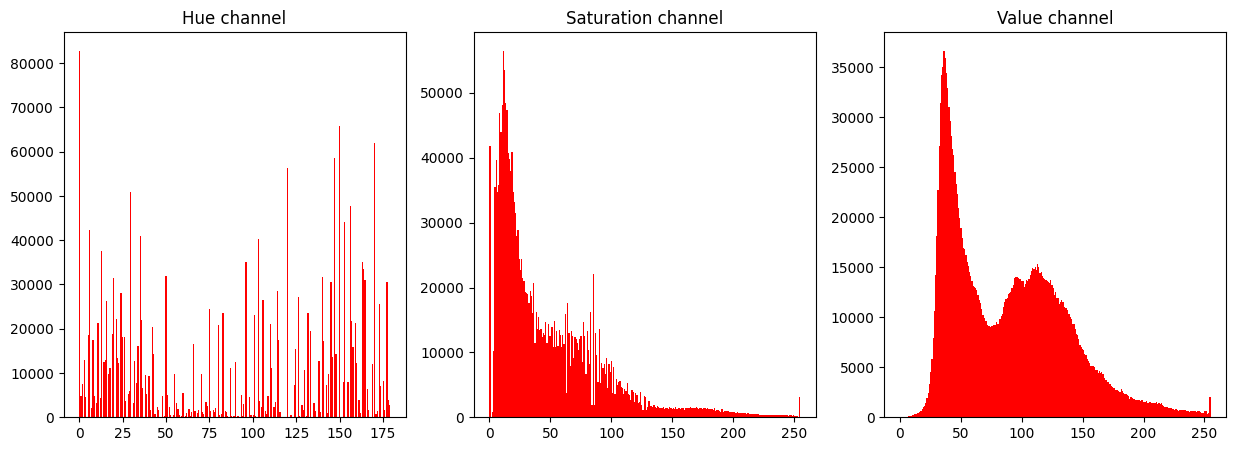

In [77]:
plot_distribution(hsv_images[0], ['Hue', 'Saturation', 'Value'])

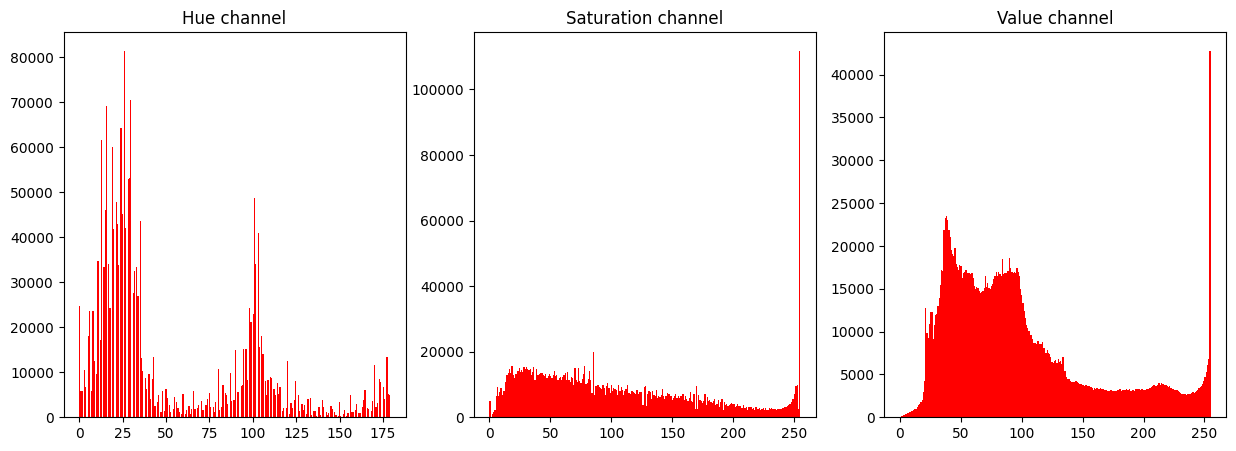

In [79]:
plot_distribution(hsv_images[1], ['Hue', 'Saturation', 'Value'])

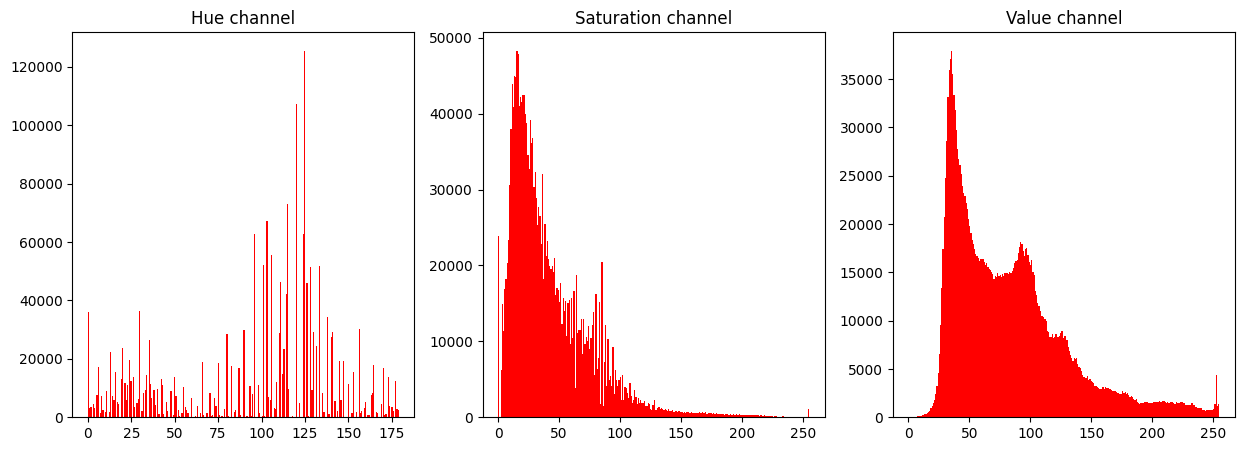

In [80]:
plot_distribution(hsv_images[2], ['Hue', 'Saturation', 'Value'])

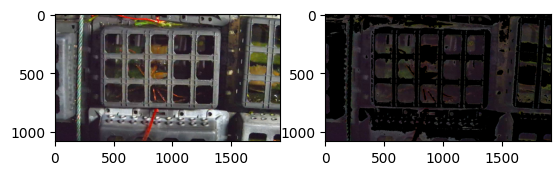

In [87]:
cond_img = cv2.cvtColor(condition_display(hsv_images[0], np.array([0,0,0]), np.array([255, 255, 80])), cv2.COLOR_HSV2RGB)

# plt.imshow(cond_img)
# plt.imshow(images[0])
plt.subplot(1,2,1)
plt.imshow(images[0])
plt.subplot(1,2,2)
plt.imshow(cond_img)
plt.show()

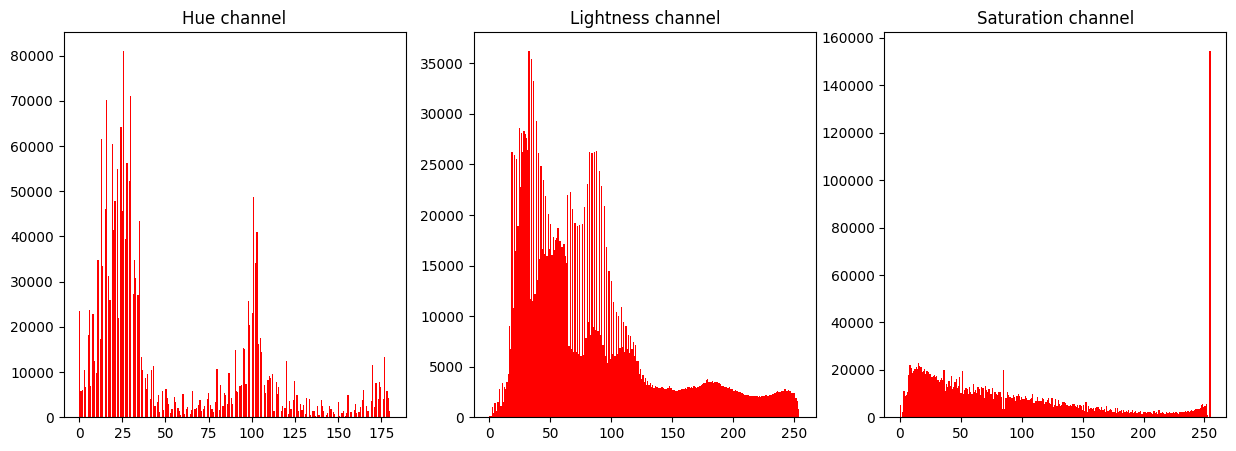

In [41]:
hsl_images = [cv2.cvtColor(image, cv2.COLOR_RGB2HLS) for image in images]

plot_distribution(hsl_images[0], ['Hue', 'Lightness', 'Saturation'])

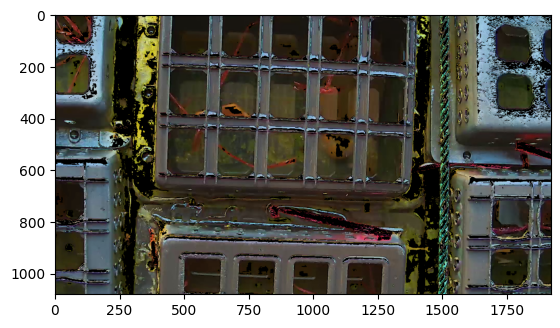

In [26]:
hsl_images = [cv2.cvtColor(image, cv2.COLOR_RGB2HLS) for image in images]

cond_img = cv2.cvtColor(condition_display(hsl_images[0], np.array([0,0,0]), np.array([255, 200, 200])), cv2.COLOR_HLS2RGB)

plt.imshow(cond_img)

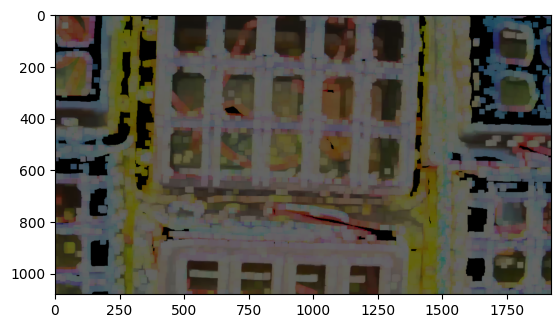

In [52]:
# erosion
kernel = np.ones((3, 3), np.uint8)
dilated_images = cv2.dilate(cond_img, kernel, iterations=10)

plt.imshow(dilated_images)

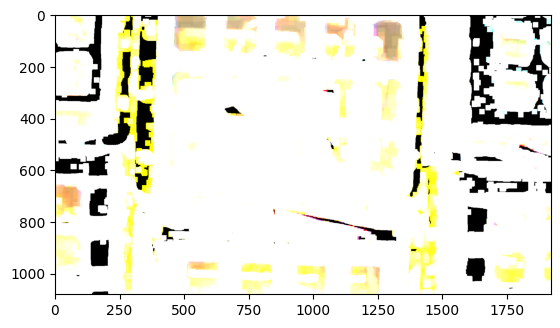

In [56]:
# sharpen
sharpening_kernel = np.array([[-1, 1, -1],
                               [ 1, 9, 1],
                               [-1, 1, -1]])
sharpened_images = cv2.filter2D(dilated_images, -1, sharpening_kernel)


plt.imshow(sharpened_images)